# 분석 2주차 과제

# 1. LinearRegression

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 단순선형회귀
list_y = []
# 1부터 20까지 X data를 만들어주었습니다.
X = np.arange(1,21) 
# X에 임의의 수를 더해 임의의 Y data를 만듭니다.
for x in X:
    list_y.append(x+np.random.randint(6))
Y = np.array(list_y)
df = pd.DataFrame({'X':X,'Y':Y})

In [3]:
# 데이터 확인
df

,X,Y
0,1,2
1,2,5
2,3,6
3,4,8
4,5,10
5,6,6
6,7,11
7,8,12
8,9,12
9,10,14


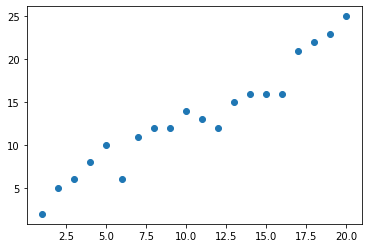

In [4]:
plt.scatter(X,Y)

**LinearRegressoion을 이용하여 X data에 대해 학습을 진행한 후 직선의 방정식을 구해주세요.**

[답] : Y = 1.05488722 * X + 2.373642105263136

In [5]:
# 모델 생성 후 학습시키기
model = LinearRegression()
model.fit(X.reshape(-1,1),Y) # X는 2차원 array 형태여야 하기 때문에 reshape한다.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# 회귀계수 구해보기
model.coef_

array([1.02030075])

In [7]:
# 상수항 구해보기
model.intercept_

2.5368421052631547

**X data에 대해 예측을 수행한 후, 그래프를 통해 학습데이터와 회귀직선을 나타내보세요.**

In [8]:
# X data에 대해 예측
prediction = model.predict(X.reshape(-1,1))
prediction

array([ 3.55714286,  4.57744361,  5.59774436,  6.61804511,  7.63834586,
        8.65864662,  9.67894737, 10.69924812, 11.71954887, 12.73984962,
       13.76015038, 14.78045113, 15.80075188, 16.82105263, 17.84135338,
       18.86165414, 19.88195489, 20.90225564, 21.92255639, 22.94285714])

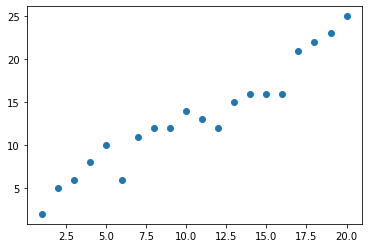

In [9]:
# 점(학습데이터)들 찍어보기
plt.plot(X,Y,'o')

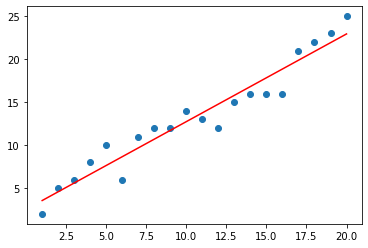

In [10]:
# 회귀직선 그려보기
plt.plot(X,Y,'o')
plt.plot(X, prediction, color = 'r')
plt.show()

**회귀분석 평가지표 중 하나를 골라 구해보세요**
- MSE, RMSE, R2_score 등

In [11]:
residuals = Y - prediction
residuals

array([-1.55714286,  0.42255639,  0.40225564,  1.38195489,  2.36165414,
       -2.65864662,  1.32105263,  1.30075188,  0.28045113,  1.26015038,
       -0.76015038, -2.78045113, -0.80075188, -0.82105263, -1.84135338,
       -2.86165414,  1.11804511,  1.09774436,  1.07744361,  2.05714286])

In [12]:
SSE = (residuals ** 2).sum()
SST = ((Y-Y.mean())**2).sum()

MSE = SSE / (len(Y) - 2)
RMSE = np.sqrt(MSE)
R2_score = 1 - (SSE/SST)
print('MSE : %.2f'% MSE)
print('RMSE : %.2f'% RMSE)
print('R2_score : %.2f'% R2_score)

MSE : 2.86
RMSE : 1.69
R2_score : 0.93


# Logistic Regression

In [13]:
# 사이킷런의 데이터셋 로드
from sklearn.datasets import load_breast_cancer

In [14]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)
df["label"] = breast_cancer.target
df.columns = [ col.replace(" ", "_") for col in df.columns]

In [15]:
# 데이터가 잘 로드되었는지 확인해보세요
df.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [16]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'label'],
      dtype='object')

## **[변수 설명]** 
radius : 반경(중심에서 외벽까지 거리들이 평균값) <br>
texture : 질감 <br>
perimeter : 둘레 <br>
area : 면적 <br>
smoothness : 매끄러움 <br>
compactness : 조그만 정도<br>
concavity : 오목함(윤곽의 오목한 부분의 정도)<br>
points : 오목한 점의 수<br>
symmetry : 대칭<br>
dimension : 프랙탈 차원<br>

In [18]:
# 이번엔 mean이 들어간 변수만 사용해보겠습니다!
# mean이 들어간 변수만 따로 뽑아 X와 Y데이터를 만들어주세요.
means = [col for col in df.columns if col[:4] == "mean"]
means

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension']

In [19]:
X = df[means]
Y = df["label"]

In [20]:
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


**Heatmap을 통해 X변수 간 상관관계를 확인해보세요!**

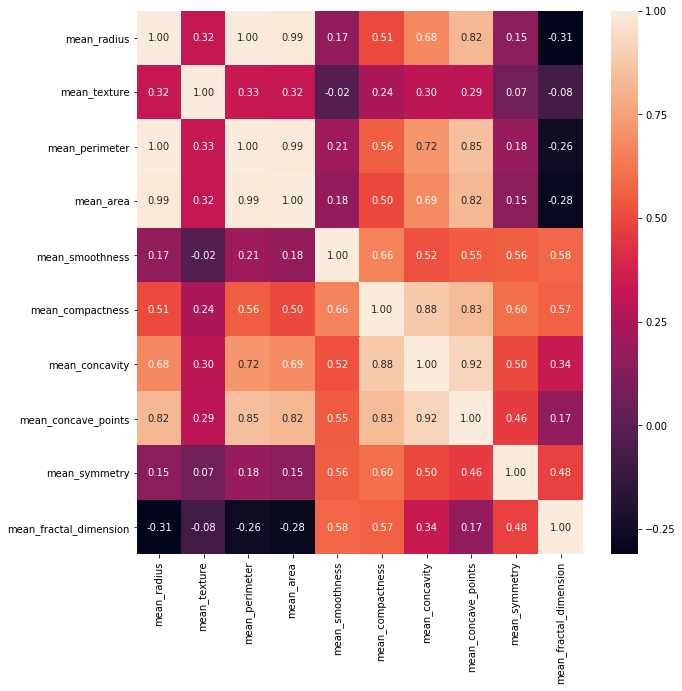

In [21]:
# heatmap을 통해 상관관계 확인
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(data = X.corr(), annot = True, fmt = '.2f') 
# annot = True arguement를 써서 각 셀에 숫자를 입력
# fmt 숫자 입력 형태 설정

### 정리 ###
# plt.title('Heatmap of correlation by seaborn', fontsize=20)
# cmap ='coolwarm', 'RdYlGn_r' 'YlGnBu' 등등 색깔 설정
# center = data.loc['',] 히트맵 색의 중심 위치 정하기
# vmax = 1, vmin = -1
# linewidths = .5

**강한 상관관계가 있는 변수들을 적어보세요!
그리고 다중공선성과 그로 인한 문제에 대해 서술해주세요.**

[답] : 

가장 강한 상관관계는 0.99의 상관성을 보입니다. 변수는 다음과 같습니다.

mean_area <-> mean_radius

mean_area <-> mean_perimeter 

mean_radius <-> mean_area
- 다중공선성의 문제

일부 독립변수가 다른 독립 변수와 강한 상관관계가 있으면, 다중공선성이 발생할 수 있습니다.
변수들 간 높은 상관관계로 중복되어 회귀선의 해석력이 감소하고, 정확도가 감소하여 판단 능력이 저하되는 문제가 발생합니다. VIF(Variance Inflation Factor)가 10 이상인 경우 다중공선성이 있다고 판단합니다.



**강한 상관관계를 가진 변수 중 일부 변수를 선택하여 X 변수를 다시 만들어주세요.**

In [22]:
from sklearn.model_selection import train_test_split

# 학습 데이터와 테스트 데이터 분할
X = df[['mean_area', 'mean_perimeter']]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

**로지스틱 회귀 모델 생성 후, test data에 대해 예측을 수행해주세요.**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

logistic = LogisticRegression().fit(X_train, Y_train)
pred = logistic.predict(X_test)
pred

C:\Users\yeongeunkim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

**Confusion Matrix를 구하고 이를 이용하여 accuracy, precision, recall을 직접 구해보세요!**

In [27]:
from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(Y_test, pred) 
TN, FP, FN, TP = cmatrix[0][0], cmatrix[0][1], cmatrix[1][0], cmatrix[1][1]

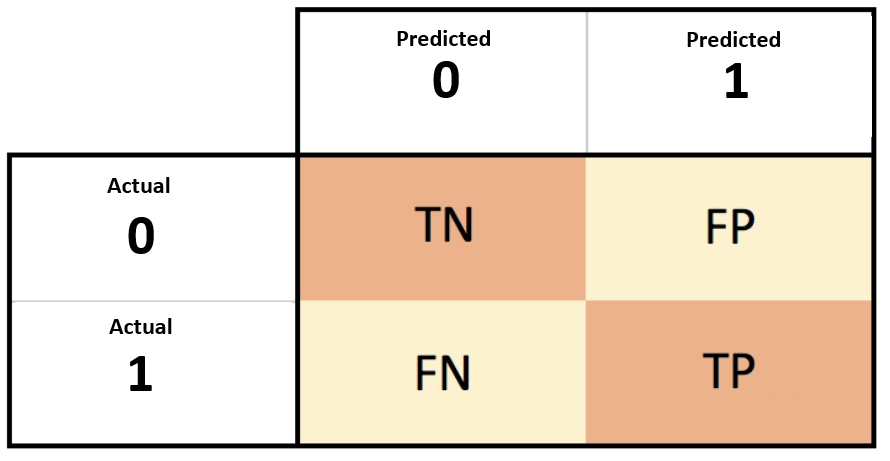

In [30]:
# accuracy
accuracy = (TN + TP) / (TN + TP + FP + FN)
accuracy

0.8304093567251462

In [31]:
# precision
precision = TP / (FP + TP)
precision

0.8495575221238938

In [32]:
# recall
recall = TP / (FN + TP)
recall

0.8888888888888888

In [33]:
print('Accuracy : {} Precision : {} Recall : {}'.format(accuracy, precision, recall))

Accuracy : 0.8304093567251462 Precision : 0.8495575221238938 Recall : 0.8888888888888888


**회귀계수를 구해보고 그 중 변수 2개를 골라 결과를 해석해보세요! (logit관점/odds관점) **

[답]: Y = -0.02197695 * X1 + 0.13724041 * X2 + 1.66938373

mean_area (X1)
- logit 관점 : mean_area가 증가할 때 유방암일 logit가 0.978배 증가한다.
- odds 관점 : mean_area가 증가할 때 유방암일 확률이 -0.02197배 증가한다.

mean_perimeter (X2)
- logit 관점 : mean_perimeter가 증가할 때 유방암일 logit가 1.1471038931421267배 증가한다.
- odds 관점 : mean_perimeter가 증가할 때 유방암일 확률이 0.13724041배 증가한다.

In [36]:
# 로지스틱 회귀의 회귀계수
print("회귀계수 area_odds / perimeter_odds : ", logistic.coef_)
# 절편
print("절편 : {} ".format(logistic.intercept_))

회귀계수 area_odds / perimeter_odds :  [[-0.02197695  0.13724041]]
절편 : [1.66938373] 


In [38]:
print("area_logit :", np.exp(logistic.coef_[0][0]))
print("perimeter_logit :", np.exp(logistic.coef_[0][1]))

area_logit : 0.9782627864152725
perimeter_logit : 1.1471038931421267


### 주어진 데이터셋을 이용하여 주어진 문제를 해결해주세요.

In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## - Feature Scaling

In [40]:
from sklearn.datasets import load_iris

#iris 데이터셋 로드
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


#### 1. iris 데이터셋에 MinMaxScaler를 적용하고 각 칼럼별 평균과 분산을 구하세요.

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit_transform(iris_df)
iris_scaler=pd.DataFrame(data=scaler, columns=iris.feature_names)
iris_scaler

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
5,0.305556,0.791667,0.118644,0.125000
6,0.083333,0.583333,0.067797,0.083333
7,0.194444,0.583333,0.084746,0.041667
8,0.027778,0.375000,0.067797,0.041667
9,0.166667,0.458333,0.084746,0.000000


In [48]:
print('feature 평균')
print(iris_scaler.mean())
print('\nfeature 분산')
print(iris_scaler.var())

feature 평균
sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64

feature 분산
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


#### 2. iris 데이터셋에 StandardScaler를 적용하고 각 칼럼별 평균과 분산을 구하세요.

In [49]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler().fit_transform(iris_df)
iris_standard=pd.DataFrame(data=standard, columns=iris.feature_names)
iris_standard

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180
6,-1.506521,0.788808,-1.340227,-1.183812
7,-1.021849,0.788808,-1.283389,-1.315444
8,-1.748856,-0.362176,-1.340227,-1.315444
9,-1.143017,0.098217,-1.283389,-1.447076


In [50]:
print('feature 평균')
print(iris_standard.mean())
print('\nfeature 분산')
print(iris_standard.var())

feature 평균
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 분산
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### 3. normalization과 standardization의 차이점을 설명하세요.

- normalizaion : 데이터의 상대적 크기에 대한 영향을 줄이기 위해 x=(x-xmin)/(xmax-xmin)
- standardizaion : 데이터가 평균으로 부터 얼마나 떨어져있는가 z=(x-u)/표준편차

## - Regularization

In [51]:
from sklearn.datasets import load_boston

#boston 집값 데이터셋 로드
boston=load_boston()
boston_price=boston.target
boston_data=boston.data
boston_df=pd.DataFrame(data=boston_data, columns=boston.feature_names)

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


#### 4. training data와 test data를 분리해주세요(비율 자유)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(boston_df, boston_price, test_size = 0.3, random_state = 100)

#### 5. LinearRegression, Ridge, Lasso 각각의 방법으로 모델을 학습시키고 예측하여 RMSE값을 구해주세요. 세 경우의 RMSE값을 비교해주세요.

In [58]:
# LinearRegression
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
pred = LR.predict(X_test)
# np.sqrt(maan_squared_error(pred,y_test))

print('RMSE값: {}'.format(np.sqrt(np.sum((y_test - pred) ** 2) / (len(y_test) - 2))))

RMSE값: 5.495103477233024


In [59]:
#Ridge
from sklearn.linear_model import Ridge

Ridge = Ridge()
Ridge.fit(X_train, y_train)
pred = Ridge.predict(X_test)
# np.sqrt(maan_squared_error(pred,y_test))

print('RMSE값: {}'.format(np.sqrt(np.sum((y_test - pred) ** 2) / (len(y_test) - 2))))

RMSE값: 5.5658246713190245


In [61]:
#Lasso
from sklearn.linear_model import Lasso

Lasso = Lasso()
Lasso.fit(X_train, y_train)
pred = Lasso.predict(X_test)
# np.sqrt(maan_squared_error(pred,y_test))

print('RMSE값: {}'.format(np.sqrt(np.sum((y_test - pred) ** 2) / (len(y_test) - 2))))

RMSE값: 6.075944794345507


In [62]:
#RMSE과 비교
#LinearRegression, Ridge, Lasso 순으로 RMSE가 작다.

# 수고하셨습니다 :D